In [1]:
from scrapenhl2.plot import visualize_game as vg
from scrapenhl2.scrape import scrape_setup as ss
from scrapenhl2.scrape import scrape_game as sg

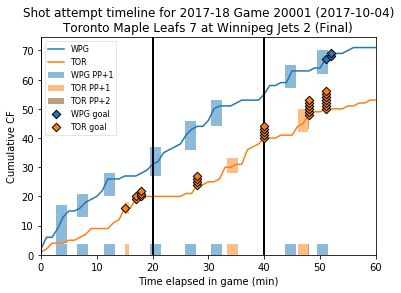

In [2]:
vg.game_timeline(2017, 20001)

In [3]:
season = 2017
game = 20001
hname = ss.team_as_str(ss.get_home_team(season, game))
rname = ss.team_as_str(ss.get_road_team(season, game))
cf = {hname: vg._get_home_cf_for_timeline(season, game), rname: vg._get_road_cf_for_timeline(season, game)}
pps = {hname: vg._get_home_adv_for_timeline(season, game), rname: vg._get_road_adv_for_timeline(season, game)}
gs = {hname: vg._get_home_goals_for_timeline(season, game), rname: vg._get_road_goals_for_timeline(season, game)}
import matplotlib.pyplot as plt
colors = {hname: plt.rcParams['axes.prop_cycle'].by_key()['color'][0],
          rname: plt.rcParams['axes.prop_cycle'].by_key()['color'][1]}
darkercolors = {team: vg._make_color_darker(hex=col) for team, col in colors.items()}
title = vg._get_corsi_timeline_title(season, game)

In [6]:
from bokeh.plotting import figure, output_file, show
from bokeh.models import Range1d
from bokeh.models.tickers import FixedTicker
from bokeh.models import HoverTool, ColumnDataSource

In [5]:
output_file("line.html")

p = figure(plot_width=400, plot_height=400)

# add a line renderer
p.line(cf[hname].Time, cf[hname].CumCF, line_width=2, color=colors[hname], legend=hname)
p.line(cf[rname].Time, cf[rname].CumCF, line_width=2, color=colors[rname], legend=rname)
p.add_tools(HoverTool(tooltips=[("Cumulative CF", "@CumCF"), ("Time (min)", "@Time")]))

xmin = 0
xmax = cf[hname].Time.max()
ymin = 0
ymax = max(cf[hname].CumCF.max(), cf[rname].CumCF.max()) + 5

p.x_range = Range1d(xmin, xmax)
p.y_range = Range1d(ymin, ymax)

for x in range(0, cf[hname].Time.max(), 20):
    p.line([x, x], [ymin, ymax], color='black', line_width=2)
    
p.xgrid.grid_line_color = None
p.xaxis.minor_tick_line_color = None
p.ygrid.grid_line_color = None

p.xaxis.axis_label = "Time elapsed in game (min)"
p.yaxis.axis_label = "Cumulative CF"

p.legend.location = "top_left"
show(p)

/Users/muneebalam/anaconda/lib/python3.6/site-packages/bokeh/core/json_encoder.py:73: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  if pd and isinstance(obj, pd.tslib.Timestamp):
